# Importing libraries

In [3]:
import numpy as np
# import matplotlib.pyplot as plt
# from tensorflow.keras.utils import array_to_img,img_to_array,load_img
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Flatten,Dense,Activation,Dropout

# Importing the data set and performing data augmentation

In [4]:
train_path = '/home/piyush/projects/python/dsplab/Gesture-controlled-opencv-calculator/train'
train_datagen = ImageDataGenerator(rescale=1./255,rotation_range = 4,
                                   width_shift_range=0.15,
                                   height_shift_range = 0.2,
                                   shear_range=0.3,
                                   fill_mode='nearest',
                                   validation_split=0.25)
train_set = train_datagen.flow_from_directory(directory=train_path, class_mode='categorical',
                                                    color_mode = 'grayscale',
                                                    target_size=(64,64), batch_size=128, shuffle=True,
                                                    subset ="training")
validation_set = train_datagen.flow_from_directory(directory=train_path,
                                                 target_size = (64,64),
                                                 batch_size = 64,
                                                 class_mode = 'categorical',
                                                 color_mode = 'grayscale',subset="validation",shuffle=True)

NameError: name 'ImageDataGenerator' is not defined

In [5]:
x_train=[]
y_train=[]
import cv2
import glob
import numpy as np
for img in glob.glob("/home/piyush/projects/python/dsplab/Gesture-controlled-opencv-calculator/train/1/*.jpg"):
    cv_img = cv2.imread(img)
    cv_img=cv2.cvtColor(cv_img, cv2.COLOR_BGR2GRAY)
    x_train.append(cv2.resize(cv_img, (64, 64)))
    y_train.append([1,0,0])
for img in glob.glob("/home/piyush/projects/python/dsplab/Gesture-controlled-opencv-calculator/train/2/*.jpg"):
    cv_img = cv2.imread(img)
    cv_img=cv2.cvtColor(cv_img, cv2.COLOR_BGR2GRAY)
    x_train.append(cv2.resize(cv_img, (64, 64)))
    y_train.append([0,1,0])
for img in glob.glob("/home/piyush/projects/python/dsplab/Gesture-controlled-opencv-calculator/train/3/*.jpg"):
    cv_img = cv2.imread(img)
    cv_img=cv2.cvtColor(cv_img, cv2.COLOR_BGR2GRAY)
    x_train.append(cv2.resize(cv_img, (64, 64)))
    y_train.append([0,0,1])
x_train = np.reshape(np.array(x_train),(-1,64,64,1))/255.0
y_train = np.array(y_train)

In [6]:
x_test=[]
y_test=[]
for img in glob.glob("/home/piyush/projects/python/dsplab/Gesture-controlled-opencv-calculator/test/1/*.jpg"):
    cv_img = cv2.imread(img)
    cv_img=cv2.cvtColor(cv_img, cv2.COLOR_BGR2GRAY)
    x_test.append(cv2.resize(cv_img, (64, 64)))
    y_test.append([1,0,0])
for img in glob.glob("/home/piyush/projects/python/dsplab/Gesture-controlled-opencv-calculator/test/2/*.jpg"):
    cv_img = cv2.imread(img)
    cv_img=cv2.cvtColor(cv_img, cv2.COLOR_BGR2GRAY)
    x_test.append(cv2.resize(cv_img, (64, 64)))
    y_test.append([0,1,0])
for img in glob.glob("/home/piyush/projects/python/dsplab/Gesture-controlled-opencv-calculator/test/3/*.jpg"):
    cv_img = cv2.imread(img)
    cv_img=cv2.cvtColor(cv_img, cv2.COLOR_BGR2GRAY)
    x_test.append(cv2.resize(cv_img, (64, 64)))
    y_test.append([0,0,1])
x_test = np.reshape(np.array(x_test),(-1,64,64,1))/255.0
y_test = np.array(y_test)

# Defing the model 

In [7]:
def make_model():
    model = Sequential()
    model.add(Conv2D(32,input_shape=(64,64,1),kernel_size=(3,3),strides=(1,1),activation='relu',padding="same"))

    model.add(Conv2D(64,kernel_size=(3,3),strides=(2,2),activation='relu',padding="same"))
    
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Dropout(0.15))
    

    model.add(Conv2D(64,kernel_size=(3,3),strides=(2,2),activation='relu',padding="same"))
    
    model.add(Conv2D(128,kernel_size=(3,3),strides=(1,1),activation='relu',padding="same"))
    
    model.add(MaxPooling2D(pool_size=(2,2)))
    
    model.add(Dropout(0.25))
    
    model.add(Flatten())
    
    model.add(Dense(64,activation='relu'))
    model.add(Dense(32,activation='relu'))
    model.add(Dense(3,activation='softmax'))
 
    
    model.compile(
          loss = 'categorical_crossentropy',
          optimizer = 'Adam',metrics = ['accuracy']
                )
    return model 

In [8]:
model = make_model()
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 64, 64, 32)        320       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 64)        18496     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 8, 8, 64)          36928     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 8, 8, 128)         73856     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 4, 4, 128)         0

2022-12-01 18:49:22.244764: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcuda.so.1
2022-12-01 18:49:22.275085: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-12-01 18:49:22.275215: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1561] Found device 0 with properties: 
pciBusID: 0000:01:00.0 name: NVIDIA GeForce GTX 1050 computeCapability: 6.1
coreClock: 1.493GHz coreCount: 5 deviceMemorySize: 3.95GiB deviceMemoryBandwidth: 104.43GiB/s
2022-12-01 18:49:22.275389: W tensorflow/stream_executor/platform/default/dso_loader.cc:55] Could not load dynamic library 'libcudart.so.10.1'; dlerror: libcudart.so.10.1: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/piyush/.local/lib/python3.8/site-packages/cv2/../../lib64:
2022-12-01 18:49:22.275453: W tensorfl

# Training the model

In [11]:
h = model.fit(
      x_train,y_train,validation_data = (x_test,y_test),
                              epochs=5,steps_per_epoch = 64,validation_steps = 48,
                              # callbacks = [
                              # keras.callbacks.EarlyStopping(monitor='val_loss',patience=3,mode='auto'),
                              # keras.callbacks.ModelCheckpoint('explo/model_{val_loss:.3f}.h5',
                              # save_best_only = True,save_weights_only=False,
                              # monitor='val_loss')
                              # ]


)
model.save('explo_model.h5')

Epoch 1/5
64/64 [==============================] - 7s 116ms/step - loss: 0.1189 - accuracy: 0.9621 - val_loss: 9.2718e-10 - val_accuracy: 1.0000
Epoch 2/5
64/64 [==============================] - 7s 112ms/step - loss: 4.4628e-07 - accuracy: 1.0000 - val_loss: 1.0596e-09 - val_accuracy: 1.0000
Epoch 3/5
64/64 [==============================] - 7s 115ms/step - loss: 5.2931e-08 - accuracy: 1.0000 - val_loss: 7.9473e-10 - val_accuracy: 1.0000
Epoch 4/5
64/64 [==============================] - 7s 107ms/step - loss: 3.5245e-08 - accuracy: 1.0000 - val_loss: 7.9473e-10 - val_accuracy: 1.0000
Epoch 5/5
59/64 [==========================>...] - 6s 106ms/step - loss: 1.6363e-08 - accuracy: 1.0000 - val_loss: 7.9473e-10 - val_accuracy: 1.0000


In [45]:
## Loading the saved model
from keras.models import load_model
model = load_model('/home/piyush/projects/python/dsplab/Gesture-controlled-opencv-calculator/explo_model.h5')

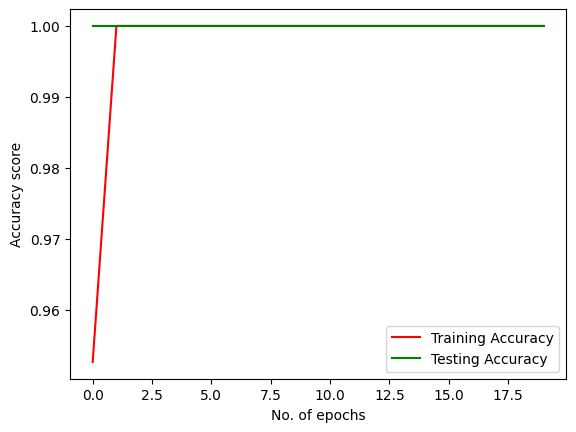

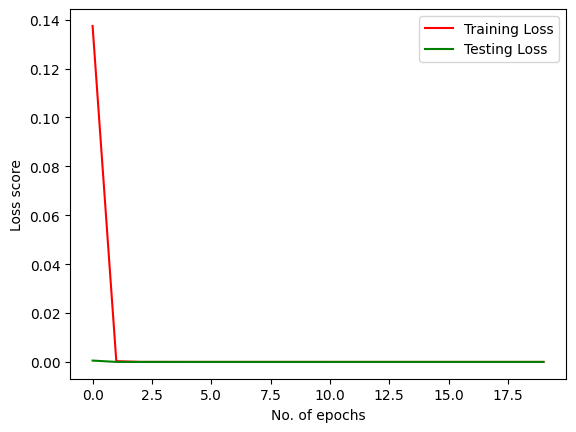

In [52]:
%matplotlib inline
accu= h.history['accuracy']
val_acc=h.history['val_accuracy']
loss=h.history['loss']
val_loss=h.history['val_loss']

epochs=range(len(accu)) #No. of epochs

import matplotlib.pyplot as plt
plt.plot(epochs,accu,'r',label='Training Accuracy')
plt.plot(epochs,val_acc,'g',label='Testing Accuracy')
plt.legend()
plt.xlabel('No. of epochs')
plt.ylabel('Accuracy score')
plt.figure()

#Plot training and validation loss per epoch
plt.plot(epochs,loss,'r',label='Training Loss')
plt.plot(epochs,val_loss,'g',label='Testing Loss')
plt.xlabel('No. of epochs')
plt.ylabel('Loss score')
plt.legend()
plt.show()
		


In [8]:
train_set.class_indices


{'gesture-0': 0,
 'gesture-1': 1,
 'gesture-10': 2,
 'gesture-11': 3,
 'gesture-12': 4,
 'gesture-13': 5,
 'gesture-14': 6,
 'gesture-15': 7,
 'gesture-16': 8,
 'gesture-17': 9,
 'gesture-2': 10,
 'gesture-3': 11,
 'gesture-4': 12,
 'gesture-5': 13,
 'gesture-6': 14,
 'gesture-7': 15,
 'gesture-8': 16,
 'gesture-9': 17}

In [9]:
labels = ['0','1','+','-','*','/','Confirm','**','%','Clear','2','3','4','5','6','7','8','9']
